In [1]:
import random
import math
from matplotlib import pyplot as plt 

In [2]:
class ParamsOptimizer:
  class_list = ["music", "speach", "silence"]
  class_params = {el: {"freq_b": [1750,], "freq_t": [8500,], "dur": [20,], "reward": [2,], "freq_b_step": 512, "freq_t_step": 512, "dur_step": 10, "direction": 1, "param_n": 0} for el in class_list} 

  def make_step(self, sound_type, new_reward):
    params = self.class_params[sound_type]

    grad = -(new_reward - params["reward"][-1])
    params["reward"].append(new_reward)

    grad_sign = 1 if grad > 0 else -1
    if grad_sign == -1:
      params["direction"] = -params["direction"]
      if params["param_n"] % 3 == 0:
        params["freq_b_step"] /= 2
      if params["param_n"] % 3 == 1:
        params["freq_t_step"] /= 2
      if params["param_n"] % 3 == 2:
        params["dur_step"] /= 2
    
    if params["param_n"] % 3 == 0:
      params["freq_b"].append(params["freq_b"][-1] + params["direction"] * params["freq_b_step"])
    if params["param_n"] % 3 == 1:
      params["freq_t"].append(params["freq_t"][-1] + params["direction"] * params["freq_t_step"])
    if params["param_n"] % 3 == 2:
      params["dur"].append(params["dur"][-1] + params["direction"] * params["dur_step"])

  def analyze(self, sound_type, reward=None):
    params = self.class_params[sound_type]

    reward = reward or math.sqrt((params["freq_b"][-1]-0)**2+(params["freq_t"][-1]-0)**2+(params["dur"][-1]-0)**2)
    
    self.make_step(sound_type, reward)
    return reward

In [3]:
result = {}
optimizer = ParamsOptimizer()
for i in range(153):
  optimizer.analyze("music")
  if i % 3 == 2:
    optimizer.class_params["music"]["param_n"] = optimizer.class_params["music"]["param_n"] + 1

52
52
52


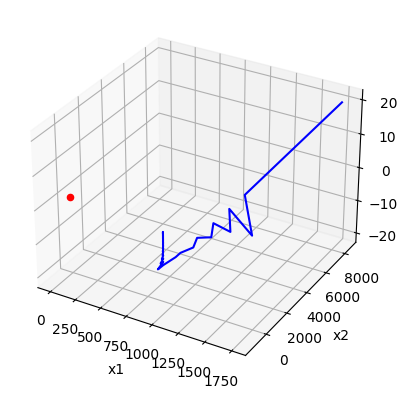

In [7]:
def draw(x1_hist, x2_hist, x3_hist, x1, x2, x3):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  print(len(x1_hist))
  print(len(x2_hist))
  print(len(x3_hist))
  ax.plot3D(x1_hist, x2_hist, x3_hist, 'b')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('x3')
  
  ax.scatter(x1, x2, x3, c='red')
  return plt.show()

draw(optimizer.class_params["music"]["freq_b"], optimizer.class_params["music"]["freq_t"], optimizer.class_params["music"]["dur"], 0,0,0)

In [5]:
[[optimizer.class_params["music"]["freq_b"][i], optimizer.class_params["music"]["freq_t"][i], optimizer.class_params["music"]["dur"][i], optimizer.class_params["music"]["reward"][i]] for i in range(len(optimizer.class_params["music"]["dur"]))]

[[1750, 8500, 20, 2],
 [1494.0, 7988, 10, 8678.300524872368],
 [1238.0, 7476, 0, 8630.320735638972],
 [982.0, 6964, -10, 8589.705699265836],
 [1110.0, 6452, -20, 8556.56029021008],
 [1046.0, 5940, -15.0, 8048.159292658166],
 [982.0, 5428, -10.0, 7540.245354098234],
 [1046.0, 4916, -15.0, 7032.924000726867],
 [1014.0, 4404, -12.5, 7032.902672439026],
 [982.0, 3892, -10.0, 7032.8955629953725],
 [1014.0, 3380, -12.5, 7032.902672439026],
 [998.0, 2868, -11.25, 7051.914350018724],
 [982.0, 2356, -10.0, 7042.124111374352],
 [998.0, 1844, -11.25, 7032.902672439026],
 [990.0, 1332, -10.625, 6526.310443121749],
 [982.0, 820, -10.0, 6020.633189291638],
 [990.0, 308, -9.6875, 5516.122551212944],
 [986.0, -204, -9.375, 5516.149744160323],
 [982.0, -716, -9.0625, 5516.133881623977],
 [986.0, -1228, -8.75, 5516.122551212944],
 [984.0, -972.0, -8.4375, 5527.874817685364],
 [982.0, -716.0, -8.125, 5521.909090160757],
 [984.0, -972.0, -7.8125, 5516.122551212944],
 [983.0, -844.0, -7.5, 5013.13075831859